-------------------------------------------------------
# **Question 8:  CONFIDENCE INTERVALS** (5 points)
-------------------------------------------------------

## Description

 A sample from a population of size 2000 yields the following 25 values:
 
 104, 109, 111, 109, 87, 86, 80, 119, 88, 122, 91, 103, 99, 108, 96, 104, 98, 98, 83, 107, 79, 87, 94, 92, 97.


## Questions

a. Calculate and print an unbiased estimate of the population mean.

b. Calculate and print an unbiased estimate of the population variance.

c. Write a Python function that computes an approximate confidence interval for the population mean.

d. Print out approximate 80%, 90%, 95%, and 98% confidence intervals for the population mean.

## Answer

### Part a

In [14]:
# Import the packages
import numpy as np
import scipy.stats as stats

# Sample data
data = [104, 109, 111, 109, 87, 86, 80, 119, 88, 122, 91, 103, 99, 108, 96, 104, 98, 98, 83, 107, 79, 87, 94, 92, 97]

# Calculate an unbiased estimate of the population mean
sample_mean = np.mean(data)
print(f"Unbiased estimate of the population mean: {sample_mean:.2f}")

Unbiased estimate of the population mean: 98.04


### Part b

In [15]:
# Calculate an estimate of the population variance with Bessel's correction
sample_variance = np.var(data, ddof=1)
print(f"Unbiased estimate of the population variance: {sample_variance:.2f}")

Unbiased estimate of the population variance: 133.71


### Part c

In [23]:
# Function to compute confidence interval
def confidence_interval(data, confidence):
    n = len(data)
    mean = np.mean(data)
    variance = np.var(data, ddof=1)
    stand_error = np.sqrt(variance/n)
    h = stand_error * stats.t.ppf((1 + confidence) / 2, n - 1)
    return mean - h, mean + h

### Part d

In [25]:
# Print out approximate confidence intervals
intervals = [0.80, 0.90, 0.95, 0.98]
for interval in intervals:
    ci_lower, ci_upper = confidence_interval(data, interval)
    print(f"{int(conf*100)}% confidence interval: {ci_lower:.2f} to {ci_upper:.2f}")

80% confidence interval: 94.99 to 101.09
90% confidence interval: 94.08 to 102.00
95% confidence interval: 93.27 to 102.81
98% confidence interval: 92.28 to 103.80


-------------------------------------------------------
# **Question 9:  MAMMOGRAPHY** (9 points)
-------------------------------------------------------

## Description

Breast cancer is one of the most common malignancies among women in the United States. If the cancer is detected early enough — before it spreads — chances of successful treatment are better. “Mammography” means screening women for breast cancer by X-rays. Does mammography speed up detection by enough to matter? The first large-scale randomized controlled experiment was HIP (Health Insurance Plan) in New York, followed by the Two-County study in Sweden. There were about half a dozen other trials as well. Some were negative (screening doesn’t help) but most were positive. By the late 1980s, mammography had gained general acceptance.

The HIP study was done in the early 1960s. HIP was a group medical practice which had at the time some 700,000 members. Subjects in the experiment were 62,000 women age 40–64, members of HIP, who were randomized to treatment or control. “Treatment” consisted of invitation to 4 rounds of annual screening — a clinical exam and mammography. The control group continued to receive usual health care. Results from the first 5 years of followup are shown in the table below. In the treatment group, about 2/3 of the women accepted the invitation to be screened, and 1/3 refused. 

| Group                | Size  | Breast Cancer | All Other |
|----------------------|-------|---------------|-----------|
| Treatment - Screened | 20,200| 23            | 428       |
| Treatment - Refused  | 10,800| 16            | 409       |
| Treatment - Total    | 31,000| 39            | 837       |
| Control - Total      | 31,000| 63            | 879       |


We are going to compare the treatment and control groups to establish whether offering mammography reduces the risk of death from breast cancer based on the HIP study. The hypothesis test should use the binomial distribution.

## Questions

a. Formulate the null hypothesis: describe the hypothesis in words and provide its mathematical statement. 

b. Formulate the alternative hypothesis: describe the hypothesis in words and provide its mathematical statement. 

c. Plot the binomial distribution illustrating the probability of different number of deaths under the null hypothesis. Select an appropriate number of trials. The number of deaths should range from 0 to 120. Indicate the cut-off region for a significance level of 5%.

d. Perform a hypothesis test using the binomial distribution with significance level of 5%. 

e. Make a decision: you can either reject the null hypothesis or fail to reject it.

f. Provide a conclusion based on your decision in part e.

## **Answer**

### Part a

The null hypothesis is that offering mammography does not reduce the risk of death from breast cancer. Mathematically, this can be stated as:

$$H_0: p_{treatment} = p_{control}.$$

### Part b

The alternative hypothesis is that offering mammography reduces the risk of death from breast cancer. Mathematically, this can be stated as:

$$H_0: p_{treatment} < p_{control}.$$

### Part c

### Preliminaries

In [5]:
# Import the packages
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

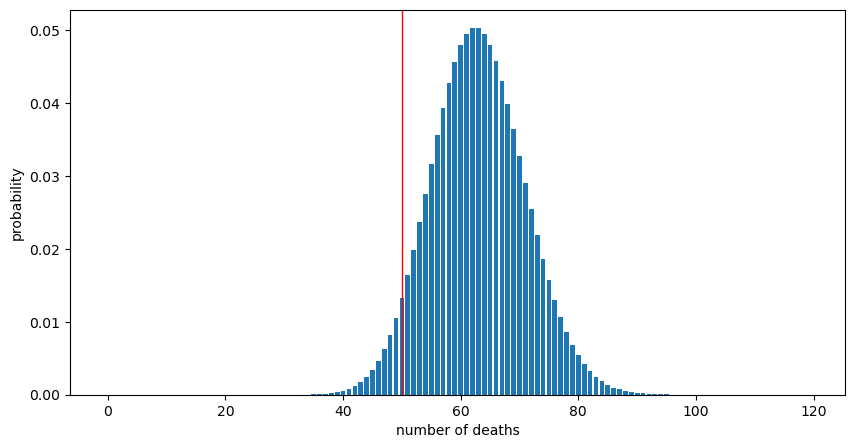

In [7]:
# Define the number of trials, p_control, and the different numbers of deaths
n = 31000
p = 63/n
k = np.arange(0, 120)

# Compute the probabilities
prob = [binom.pmf(i, n, p) for i in k]    # Probabilities, calculated using ~ Binom( 31000, 0.002 ), for each value of k

# Make a plot
plt.figure(figsize = (10, 5))
plt.bar(k, prob)
plt.axvline(50, color = 'red', linestyle = '-', linewidth=1)
plt.xlabel("number of deaths")
plt.ylabel("probability")

plt.show()

### Part d

In [11]:
# Finding the p-value using the binomial distribution
result = stats.binomtest(k = 39, n = n, p = p, alternative='less')
print("The p-value is", round(result.pvalue, 4))

The p-value is 0.0008


### Part e

The obtained p-value is less than 0.05, we reject the null hypothesis at a 95% confidence level.

### Part f

We conclude that offering mammography reduces the risk of death from breast cancer.